In [1]:
from CSOWP_SR import *
from ExpressionTree import *

In [2]:
X = np.linspace(0, 12, 1000)
y = X

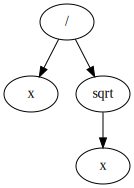

In [6]:
SR = SymbolicRegression(3)
SR.fit(np.c_[X], y, feature_names=["x"])
tree = SR.generate_expr(2)
tree.visualize_tree()

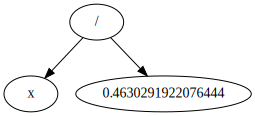

In [15]:
AEG = SR._convert_to_AEG(tree)
AEG = SR.mutateSExp(AEG)
AEG.sexp.visualize_tree()